<h2>Project 1 - DATA 620 Web Analytics (Week 5)</h2>

<h3>Mohamed Thasleem, Kalikul Zaman</h3>

<h3>Introduction</h3>
In this exercise, we look at the flight route network between airports in the United States of America and represent the airport and flight routes through graph network also perform some test on categorical variable TimeZone used in the data.

<h3>Data</h3>
Acquired data from https://openflights.org/data.html - It has data information on different airpotes, routes, countries and flights.
We have used only airport and routes information for this exercise.

The airport.dat dataset contains geographic information of all the listed airport

The routes.dat dataset contains geographic information of all the listed airports

<h4>Import libraries</h4>

In [ ]:
# import libaries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines
from pandasql import sqldf
import scipy

<h4>Reading airport data</h4>

In [18]:
#airport data
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("airports.dat",names = airport_col, index_col = 0)
airport_df.head()

,Name,City,Country,IATA,ICAO,Lat,Long,Alt,Timezone,DST,Tz database time zone,type,source
ID,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


<h4>Reading routes data</h4>

In [75]:
#routes data
route_col = ['Airline', 'Airline ID', 'Source_Airport', 'Source Airport ID', 'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("routes.dat",names = route_col)

In [76]:
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 

In [77]:
routes_df.head()

,Airline,Airline ID,Source_Airport,Source Airport ID,Dest Airport,Dest Airport ID,Codeshare,Stops,equipment
0,2B,410,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410,CEK,2968.0,KZN,2990.0,NaN,0,CR2
4,2B,410,CEK,2968.0,OVB,4078.0,NaN,0,CR2


<h4>Merge airline and routes data</h4>

In [22]:
airport_us = airport_df[(airport_df.Country == "United States")][['Name','Lat', 'Long', 'IATA', 'ICAO', 'Timezone']]
us_airport_ix = airport_us.index.values
airport_us.head()
#IATA - International Air Transport Association
#ICAO - International Civil Aviation Organization

In [25]:
#extract routes that flyies from AND to USA
routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) & (routes_df['Dest Airport ID'].isin(us_airport_ix))]
# to find number of flights in and out of an airport
routes_us =  pd.DataFrame(routes_us.groupby(['Source_Airport', 'Dest Airport']).size().reset_index(name='counts'))
# it is similar to find number of rows in which each airport occur in either one of the 2 columns
counts = routes_us['Source_Airport'].append(routes_us.loc[routes_us['Source_Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
# create a data frame of position based on names in count
counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
ignore_IATA = ['HKB']
counts = counts[~counts.IATA.isin(ignore_IATA)]
pos_data = counts.merge(airport_us, on = 'IATA')

<h4>Categorizing data based on TimeZone</h4>

In [26]:
pos_data.loc[pos_data.Timezone == "-5", 'TzName'] = "Eastern"
pos_data.loc[pos_data.Timezone == "-6", 'TzName'] = "Central"
pos_data.loc[pos_data.Timezone == "-7", 'TzName'] = "Mountain"
pos_data.loc[pos_data.Timezone == "-8", 'TzName'] = "Pacific"
pos_data.loc[pos_data.Timezone == "-9", 'TzName'] = "Alaska"
pos_data.loc[pos_data.Timezone == "-10", 'TzName'] = "Hawaii"

,IATA,total_flight,Name,Lat,Long,ICAO,Timezone,TzName
0,ATL,305,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,KATL,-5,Eastern
1,DEN,295,Denver International Airport,39.861698,-104.672997,KDEN,-7,Mountain
2,ORD,295,Chicago O'Hare International Airport,41.978600,-87.904800,KORD,-6,Central
3,DFW,274,Dallas Fort Worth International Airport,32.896801,-97.038002,KDFW,-6,Central
4,MSP,232,Minneapolis-St Paul International/Wold-Chamber...,44.882000,-93.221802,KMSP,-6,Central


In [27]:
routes_us.describe()

,counts
count,5450.000000
mean,1.929908
std,1.415979
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,20.000000


<h4>Connecting the flight cities and routes</h4>

Name: 
Type: DiGraph
Number of nodes: 549
Number of edges: 5450
Average in degree:   9.9271
Average out degree:   9.9271


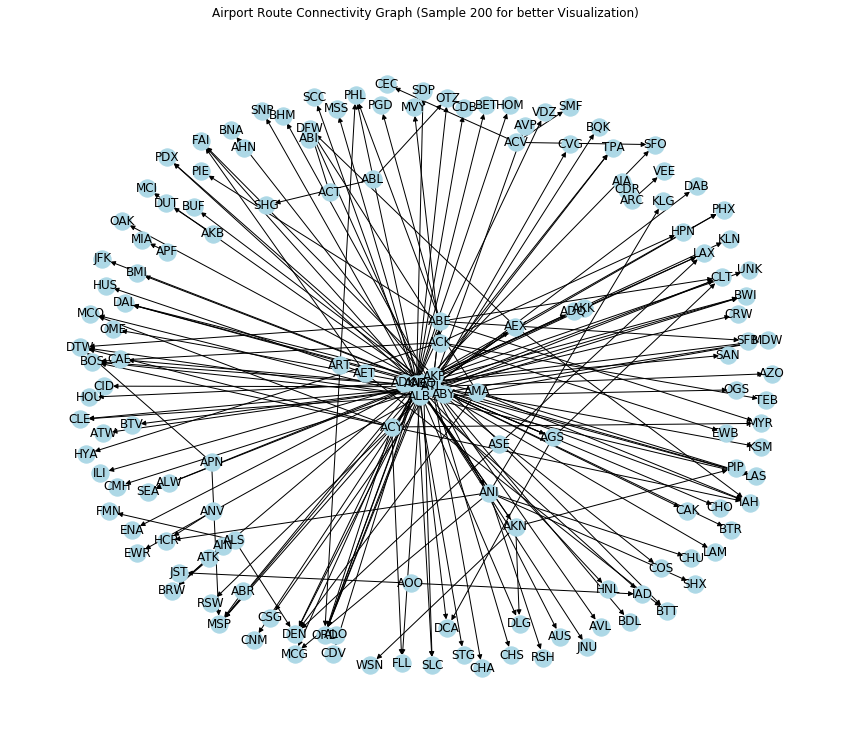

In [28]:
# Create graph
graph1 = nx.from_pandas_edgelist(routes_us.head(200), source = 'Source_Airport', target = 'Dest Airport',edge_attr = 'counts',create_using = nx.DiGraph())
graph = nx.from_pandas_edgelist(routes_us, source = 'Source_Airport', target = 'Dest Airport',edge_attr = 'counts',create_using = nx.DiGraph())

print(nx.info(graph))

plt.figure(figsize = (15,13))
plt.title("Airport Route Connectivity Graph (Sample 200 for better Visualization)")
plt.savefig("map_0.png", format = "png", dpi = 300)

nx.draw_networkx(graph1, node_color='lightblue')
plt.axis('off')
plt.show(1)

<h4>Degree and Eigen Centrality</h4>

Degree centrality assigns an importance score based simply on the number of links held by each node. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1, higher values mean that the node is more central

Like degree centrality, EigenCentrality measures a node’s influence based on the number of links it has to other nodes in the network. EigenCentrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have, and so on through the network.

In [29]:
cf = pd.DataFrame()
cf['eig_centrality'] = nx.eigenvector_centrality(graph).values()
cf['deg_centrality'] = nx.degree_centrality(graph).values()
cf.index = list(graph)
cf

,eig_centrality,deg_centrality
ABE,2.139671e-02,0.032847
ATL,1.965945e-01,0.556569
CLT,1.711015e-01,0.397810
DTW,1.749602e-01,0.414234
MYR,4.410511e-02,0.076642
...,...,...
SMK,1.507898e-05,0.003650
TBN,2.712643e-03,0.003650
UIN,2.712643e-03,0.003650
TLJ,7.390951e-22,0.001825


<h3>Time Zone as Categorical variable</h3>

In [39]:
tr=routes_us.sort_values(by='counts', ascending=False)
pos2 = tr.merge(pos_data.rename({'IATA': 'Source_Airport'}, axis=1), on='Source_Airport', how='left', indicator=True)
pos2.head()

,Source_Airport,Dest Airport,counts,total_flight,Name,Lat,Long,ICAO,Timezone,TzName,_merge
0,ORD,ATL,20,295.0,Chicago O'Hare International Airport,41.9786,-87.904800,KORD,-6,Central,both
1,ATL,ORD,19,305.0,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,KATL,-5,Eastern,both
2,ORD,MSY,13,295.0,Chicago O'Hare International Airport,41.9786,-87.904800,KORD,-6,Central,both
3,ATL,MIA,12,305.0,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,KATL,-5,Eastern,both
4,MIA,ATL,12,97.0,Miami International Airport,25.7932,-80.290604,KMIA,-5,Eastern,both


<h3>T- Test</h3>
The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

<h3>T-score</h3>
The t score is a ratio between the difference between two groups and the difference within the groups
A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

In [66]:
data1 = pos2[pos2['TzName']=='Central'].total_flight
data2 = pos2[pos2['TzName']=='Eastern'].total_flight
data1

0       295.0
2       295.0
7        76.0
13      274.0
26       76.0
        ...  
5424     91.0
5425     91.0
5430     91.0
5441      8.0
5449     91.0
Name: total_flight, Length: 1419, dtype: float64

In [68]:
data2

1       305.0
3       305.0
4        97.0
5       305.0
8       305.0
        ...  
5443     26.0
5444     26.0
5445     26.0
5446     26.0
5447     26.0
Name: total_flight, Length: 2325, dtype: float64

In [67]:
twosample_results = scipy.stats.ttest_ind(data1, data2)
twosample_results

Ttest_indResult(statistic=4.4806823564796705, pvalue=7.662939333664158e-06)

<b>Since our p-value is much higher, indicates weak evidence against the null hypothesis</b>

<h3>Plotting the routes on Basemap</h3>

In [103]:
airport_us = airport_df[(airport_df.Country == "United States") & (airport_df.Lat > 25) & (airport_df.Lat < 50) & (airport_df.Long > -130) & (airport_df.Long < -60)]
airport_us

,Name,City,Country,IATA,ICAO,Lat,Long,Alt,Timezone,DST,Tz database time zone,type,source
ID,,,,,,,,,,,,,
3416,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,113,-5,A,America/New_York,airport,OurAirports
3425,Laurence G Hanscom Field,Bedford,United States,BED,KBED,42.470001,-71.289001,133,-5,A,America/New_York,airport,OurAirports
3432,Oscoda Wurtsmith Airport,Oscoda,United States,OSC,KOSC,44.451599,-83.394096,633,-5,A,America/New_York,airport,OurAirports
3433,Marina Municipal Airport,Fort Ord,United States,OAR,KOAR,36.681900,-121.762001,137,-8,A,America/Los_Angeles,airport,OurAirports
3434,Sacramento Mather Airport,Sacramento,United States,MHR,KMHR,38.553902,-121.297997,98,-8,A,America/Los_Angeles,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13717,Camp Pendleton MCAS (Munn Field) Airport,Oceanside,United States,\N,KNFG,33.301300,-117.355003,78,\N,\N,\N,airport,OurAirports
13757,Vidalia Regional Airport,Vidalia,United States,VDI,KVDI,32.192699,-82.371201,275,-4,A,\N,airport,OurAirports
13758,Granbury Regional Airport,Granbury,United States,\N,KGDJ,32.444401,-97.816902,778,-5,A,\N,airport,OurAirports


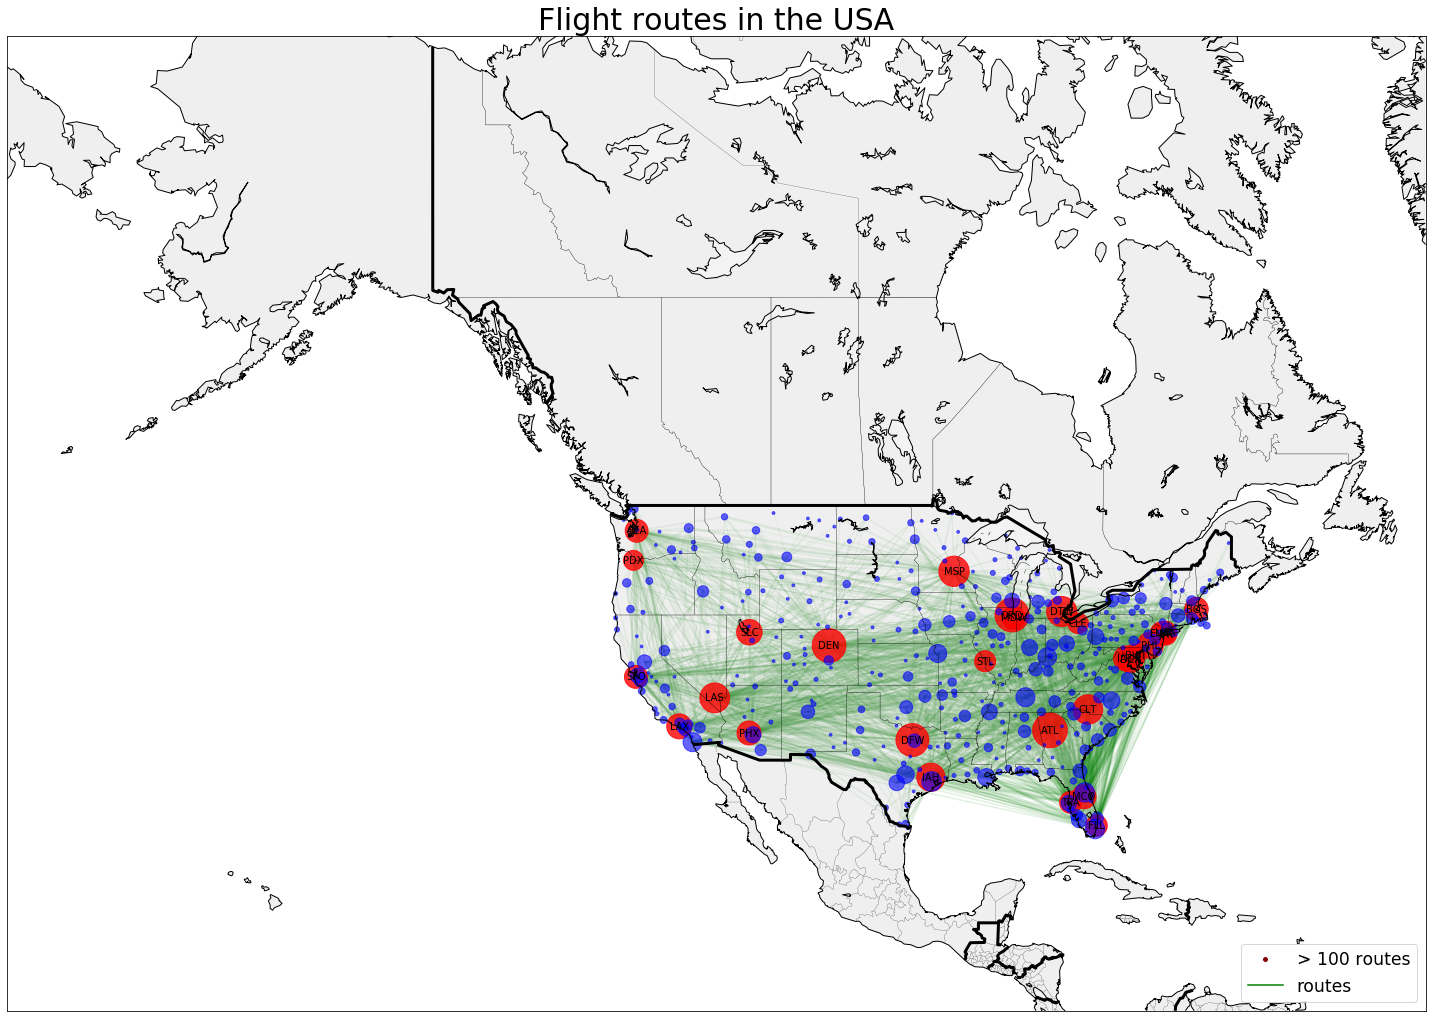

In [102]:
us_airport_ix = airport_us.index.values
routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) & (routes_df['Dest Airport ID'].isin(us_airport_ix))] 
routes_us = pd.DataFrame(routes_us.groupby(['Source_Airport', 'Dest Airport']).size().reset_index(name='counts'))

counts = routes_us['Source_Airport'].append(routes_us.loc[routes_us['Source_Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
pos_data = counts.merge(airport_us, on = 'IATA')

graph = nx.from_pandas_edgelist(routes_us, source = 'Source_Airport', target = 'Dest Airport',
                        edge_attr = 'counts',create_using = nx.DiGraph())

plt.figure(figsize=(20,25))
m = Basemap(
        projection='merc',
        llcrnrlon=-180,
        llcrnrlat=10,
        urcrnrlon=-50,
        urcrnrlat=70,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])

nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 100],node_color = 'r', alpha = 0.8,node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 100])
nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 100})
nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 100],node_color = 'b', alpha = 0.6,node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 100])
nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_us['counts']*0.75, alpha=0.06, arrows = False)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
m.fillcontinents(alpha = 0.3)
line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="maroon")
#line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="yellow")
line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="blue")
plt.legend((line1, line3), ('> 100 routes','routes'),
           loc=4, fontsize = 'xx-large')
plt.title("Flight routes in the USA", fontsize = 30)
plt.tight_layout()
plt.savefig("map_3.png", format = "png", dpi = 300)
plt.show()